# About Dataset

**Human society needs to increase food production by an estimated 70% by 2050 to feed an expected population size that is predicted to be over 9 billion people. Currently, infectious diseases reduce the potential yield by an average of 40% with many farmers in the developing world experiencing yield losses as high as 100%. The widespread distribution of smartphones among crop growers around the world with an expected 5 billion smartphones by 2020 offers the potential of turning the smartphone into a valuable tool for diverse communities growing food. One potential application is the development of mobile disease diagnostics through machine learning and crowdsourcing. Here we announce the release of over 50,000 expertly curated images on healthy and infected leaves of crops plants through the existing online platform PlantVillage. We describe both the data and the platform. These data are the beginning of an on-going, crowdsourcing effort to enable computer vision approaches to help solve the problem of yield losses in crop plants due to infectious diseases.**

# Liberaries

In [1]:
# Dowload the packages
!pip install split-folders

In [2]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.8/989.8 kB 15.5 MB/s eta 0:00:00a 0:00:01


In [3]:
import splitfolders
from re import sub
from skimage.io import  imread, imshow
from skimage.transform import  resize, rescale
from skimage.color import rgb2gray
import numpy as np
from os import listdir, path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,os.path
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [4]:
#Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

# Loading The Data by Image Data Generator

## Color Images

In [5]:
# Make a directory images
os.mkdir('images')

# Make subdirectories train, val, test
os.mkdir(os.path.join('images', 'train'))
os.mkdir(os.path.join('images', 'val'))
os.mkdir(os.path.join('images', 'test'))

In [7]:
# Split the data into folders
DATA_DIR = '/kaggle/input/plantvillage-dataset/color'
splitfolders.ratio(DATA_DIR,output = "images",seed = 42,ratio = (0.80,0.10,0.10))

Copying files: 54305 files [05:45, 157.32 files/s]


In [8]:
# Remove the directories we saved before

TRAIN_PATH = "./images/train"
VAL_PATH = "./images/val"
TEST_PATH  = "./images/test"
PATHS = [TRAIN_PATH, VAL_PATH, TEST_PATH]

In [9]:
# Generate batches of tensor image data with real-time ImageDataGenerator

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [10]:
train_gen = datagen.flow_from_directory(directory = '/kaggle/input/plantvillage-dataset/color', 
                                          class_mode="categorical",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

Found 54305 images belonging to 38 classes.


In [11]:
val_gen = datagen.flow_from_directory(directory = '/kaggle/input/plantvillage-dataset/color', 
                                          class_mode="categorical",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          color_mode='rgb',
                                          seed = 1234,
                                          shuffle = True)

Found 54305 images belonging to 38 classes.


In [12]:
test_gen = datagen.flow_from_directory(directory = '/kaggle/input/plantvillage-dataset/color', 
                                          class_mode="categorical",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          color_mode='rgb',
                                          shuffle = False)

Found 54305 images belonging to 38 classes.


In [13]:
BATCH_SIZE = 32
IMG_SIZE = (255, 255)

data_dir = "../input/plantvillage-dataset/color"
train_dataset = image_dataset_from_directory(data_dir,
                                             shuffle=True,
                                             label_mode = 'categorical',
                                             validation_split = 0.2,
                                             batch_size=BATCH_SIZE,
                                             seed = 42,
                                             subset = "training",
                                             image_size=IMG_SIZE)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.


# Look at the Data

In [14]:
class_names = train_dataset.class_names
num_classes = len(class_names)

for i in range(1, num_classes + 1):
    print(str(i) + ". ", class_names[i - 1])

1.  Apple___Apple_scab
2.  Apple___Black_rot
3.  Apple___Cedar_apple_rust
4.  Apple___healthy
5.  Blueberry___healthy
6.  Cherry_(including_sour)___Powdery_mildew
7.  Cherry_(including_sour)___healthy
8.  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
9.  Corn_(maize)___Common_rust_
10.  Corn_(maize)___Northern_Leaf_Blight
11.  Corn_(maize)___healthy
12.  Grape___Black_rot
13.  Grape___Esca_(Black_Measles)
14.  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
15.  Grape___healthy
16.  Orange___Haunglongbing_(Citrus_greening)
17.  Peach___Bacterial_spot
18.  Peach___healthy
19.  Pepper,_bell___Bacterial_spot
20.  Pepper,_bell___healthy
21.  Potato___Early_blight
22.  Potato___Late_blight
23.  Potato___healthy
24.  Raspberry___healthy
25.  Soybean___healthy
26.  Squash___Powdery_mildew
27.  Strawberry___Leaf_scorch
28.  Strawberry___healthy
29.  Tomato___Bacterial_spot
30.  Tomato___Early_blight
31.  Tomato___Late_blight
32.  Tomato___Leaf_Mold
33.  Tomato___Septoria_leaf_spot
34.  Tomato_

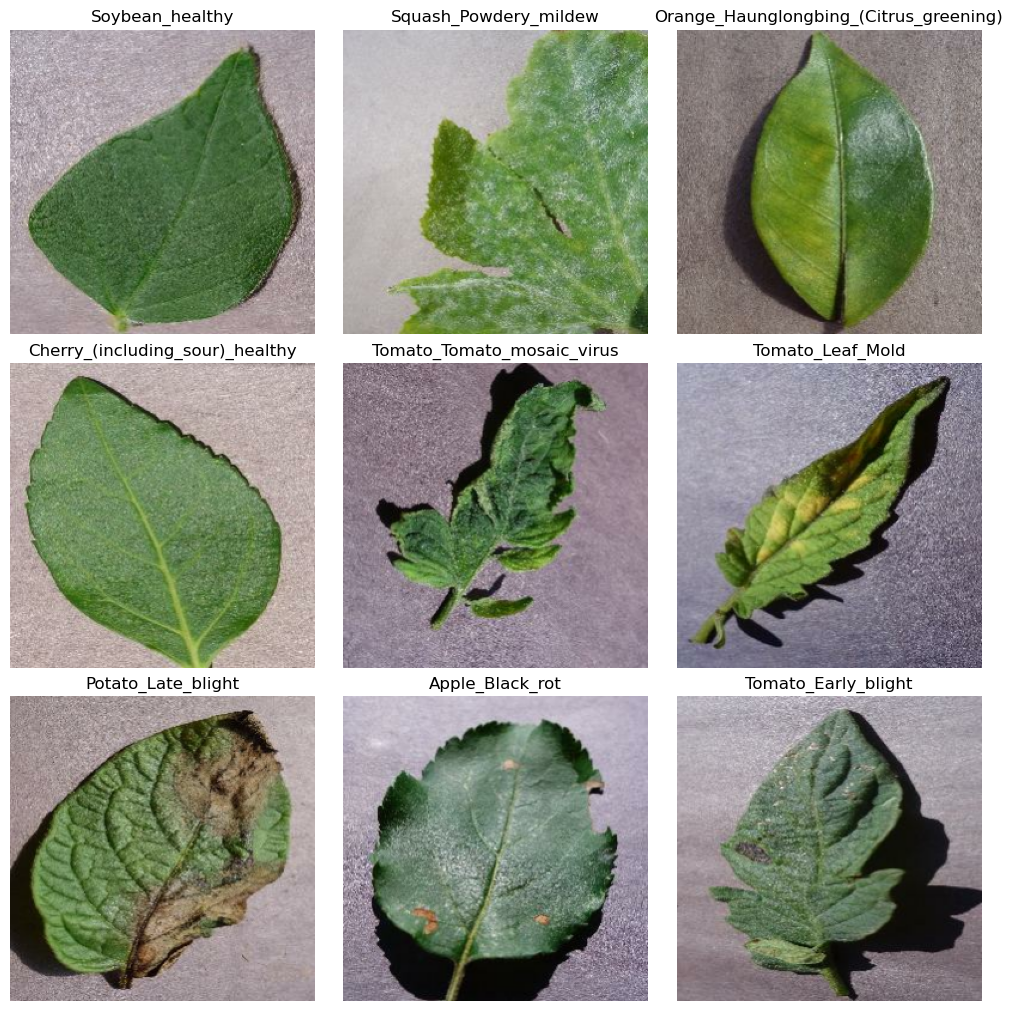

In [15]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = sub(r"[_]+","_",class_names[np.argmax(labels[i])])
        plt.title(title)
        plt.axis("off")

In [16]:
# Set some default variables
DATA_DIR = '/kaggle/input/plantvillage-dataset/color'

# Check the content

pairs = list()
number = list()

for directory in os.listdir(path=DATA_DIR):
    columns = directory.split('___')
    columns.append(directory)
    
    sub_path = DATA_DIR + '/' + directory
    columns.append(len([name for name in os.listdir(path=sub_path)]))
    
    pairs.append(columns)
    
pairs = pd.DataFrame(pairs, columns=['Plant', 'Disease', 'Directory', 'Files'])
pairs.sort_values(by='Plant')

Plant                               Disease  \
27                    Apple                               healthy   
20                    Apple                      Cedar_apple_rust   
16                    Apple                             Black_rot   
13                    Apple                            Apple_scab   
17                Blueberry                               healthy   
18  Cherry_(including_sour)                        Powdery_mildew   
30  Cherry_(including_sour)                               healthy   
31             Corn_(maize)                          Common_rust_   
10             Corn_(maize)   Cercospora_leaf_spot Gray_leaf_spot   
37             Corn_(maize)                               healthy   
7              Corn_(maize)                  Northern_Leaf_Blight   
23                    Grape    Leaf_blight_(Isariopsis_Leaf_Spot)   
28                    Grape                             Black_rot   
32                    Grape                  Esca_(Black_Measles)   
2                     Grape                               healthy   
3                    Orange       Haunglongbing_(Citrus_greening)   
19                    Peach                        Bacterial_spot   
12                    Peach                               healthy   
36             Pepper,_bell                        Bacterial_spot   
22             Pepper,_bell                               healthy   
6                    Potato                               healthy   
29                   Potato                          Early_blight   
24                   Potato                           Late_blight   
33                Raspberry                               healthy   
4                   Soybean                               healthy   
5                    Squash                        Powdery_mildew   
26               Strawberry                               healthy   
11               Strawberry                           Leaf_scorch   
34                   Tomato                             Leaf_Mold   
1                    Tomato                               healthy   
35                   Tomato  Spider_mites Two-spotted_spider_mite   
8                    Tomato                          Early_blight   
9                    Tomato                    Septoria_leaf_spot   
21                   Tomato                           Target_Spot   
15                   Tomato                        Bacterial_spot   
14                   Tomato         Tomato_Yellow_Leaf_Curl_Virus   
25                   Tomato                   Tomato_mosaic_virus   
0                    Tomato                           Late_blight   

                                            Directory  Files  
27                                    Apple___healthy   1645  
20                           Apple___Cedar_apple_rust    275  
16                                  Apple___Black_rot    621  
13                                 Apple___Apple_scab    630  
17                                Blueberry___healthy   1502  
18           Cherry_(including_sour)___Powdery_mildew   1052  
30                  Cherry_(including_sour)___healthy    854  
31                        Corn_(maize)___Common_rust_   1192  
10  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...    513  
37                             Corn_(maize)___healthy   1162  
7                 Corn_(maize)___Northern_Leaf_Blight    985  
23         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)   1076  
28                                  Grape___Black_rot   1180  
32                       Grape___Esca_(Black_Measles)   1383  
2                                     Grape___healthy    423  
3            Orange___Haunglongbing_(Citrus_greening)   5507  
19                             Peach___Bacterial_spot   2297  
12                                    Peach___healthy    360  
36                      Pepper,_bell___Bacterial_spot    997  
22                             Pepper,_bell___healthy   1478  
6      

# Model Architecture

In [17]:
# to make this notebook's output stable across runs

def reset_graph(seed=41):
    tf.random.set_seed(seed)
    np.random.seed(seed) 

## MobileNetV2 Model

In [18]:
from keras.applications.mobilenet_v2 import MobileNetV2


model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='max')

9406464/9406464 [==============================] - 0s 0us/step


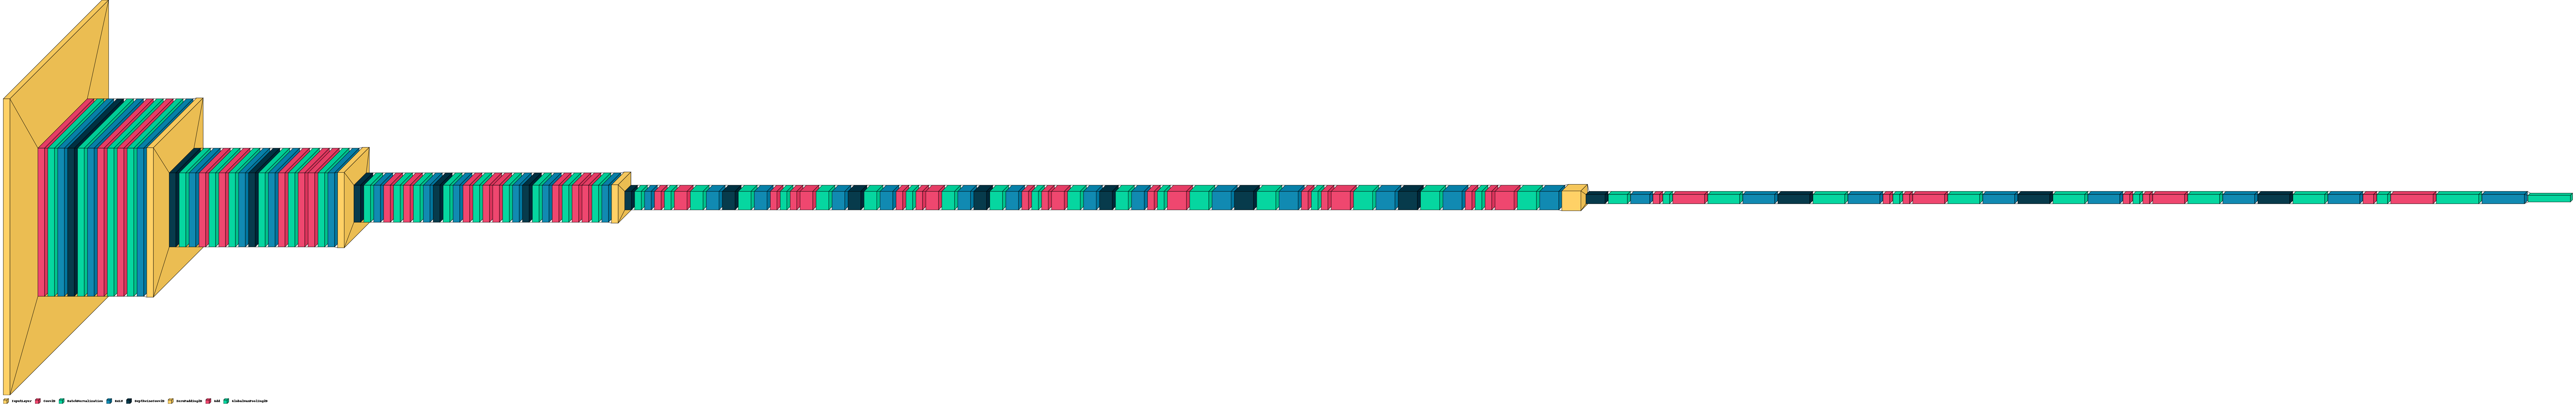

In [19]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [20]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

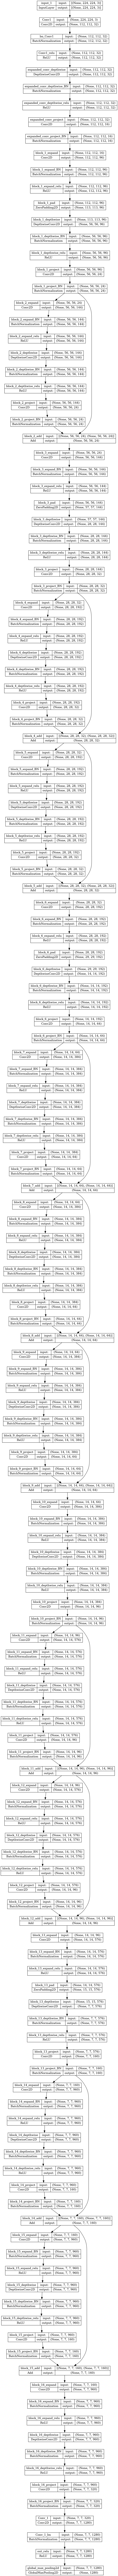

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file= 'model_plot.png', show_shapes = True, show_layer_names=True)

## MobileNetV2 + Our Model

In [22]:
# We fix the parameters of the pretrained model
model.trainable = False

In [23]:
# Add data augmentation layers
augmentation = tf.keras.Sequential([
   tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"), 
   tf.keras.layers.experimental.preprocessing.RandomRotation(0.15),
   tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
   tf.keras.layers.experimental.preprocessing.RandomContrast(0.15),
])

In [24]:
# Here we add final layers to the first model
inputs = model.input
x = augmentation(inputs)

x = BatchNormalization()(model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.45, seed=1234)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.45, seed=1235)(x)
x = Flatten()(x)

outputs = Dense(38, activation='softmax')(x)

mobilenet_model = Model(inputs=inputs, outputs=outputs)

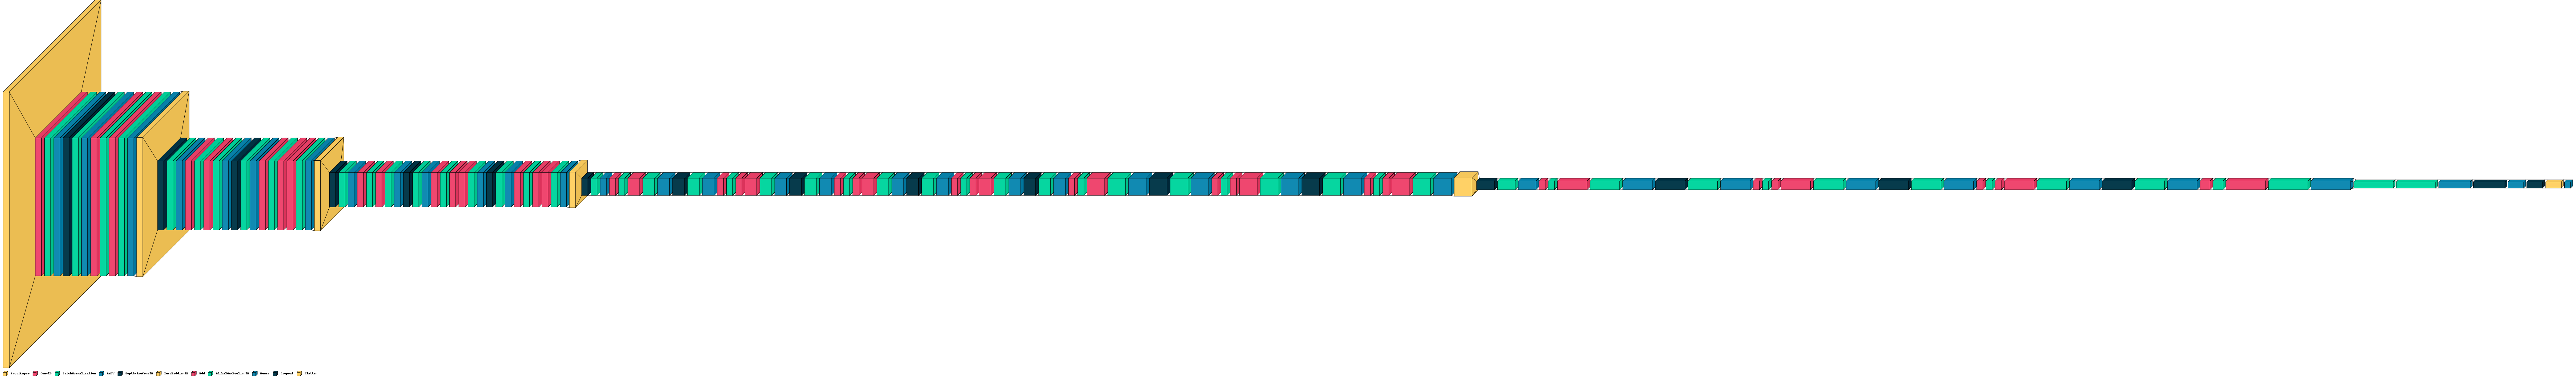

In [25]:
visualkeras.layered_view(mobilenet_model, legend=True)

In [26]:
mobilenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

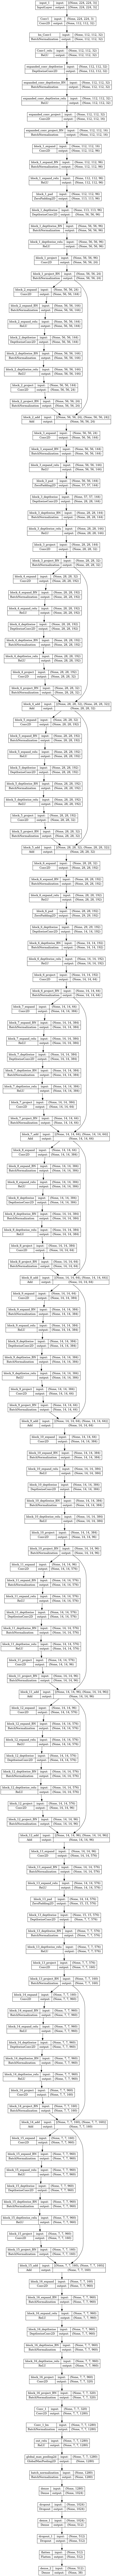

In [27]:
plot_model(mobilenet_model, to_file= 'mobilenet_model_plot.png', show_shapes = True, show_layer_names=True)

# Model training

In [28]:
reset_graph(seed=9)

mobilenet_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [29]:
model_training = mobilenet_model.fit(train_gen, epochs=10, verbose=1, validation_data=val_gen)

Epoch 1/10
1698/1698 [==============================] - 384s 219ms/step - loss: 0.5900 - accuracy: 0.8315 - val_loss: 0.1566 - val_accuracy: 0.9490
Epoch 2/10
1698/1698 [==============================] - 334s 197ms/step - loss: 0.3364 - accuracy: 0.9005 - val_loss: 0.1400 - val_accuracy: 0.9506
Epoch 3/10
1698/1698 [==============================] - 317s 187ms/step - loss: 0.2954 - accuracy: 0.9152 - val_loss: 0.1132 - val_accuracy: 0.9640
Epoch 4/10
1698/1698 [==============================] - 333s 196ms/step - loss: 0.2651 - accuracy: 0.9242 - val_loss: 0.0798 - val_accuracy: 0.9741
Epoch 5/10
1698/1698 [==============================] - 314s 185ms/step - loss: 0.2525 - accuracy: 0.9305 - val_loss: 0.0730 - val_accuracy: 0.9764
Epoch 6/10
1698/1698 [==============================] - 322s 189ms/step - loss: 0.2282 - accuracy: 0.9381 - val_loss: 0.0586 - val_accuracy: 0.9820
Epoch 7/10
1698/1698 [==============================] - 318s 187ms/step - loss: 0.2253 - accuracy: 0.9404 - val_

# History

In [30]:
# History
pd.DataFrame(model_training.history)

loss  accuracy  val_loss  val_accuracy
0  0.589955  0.831452  0.156597      0.949029
1  0.336350  0.900525  0.139975      0.950612
2  0.295379  0.915183  0.113214      0.964018
3  0.265093  0.924151  0.079777      0.974054
4  0.252487  0.930504  0.072988      0.976356
5  0.228192  0.938072  0.058605      0.982046
6  0.225338  0.940392  0.049889      0.984845
7  0.212434  0.945143  0.057566      0.983188
8  0.196002  0.949434  0.048803      0.985876
9  0.204409  0.947795  0.042229      0.986355

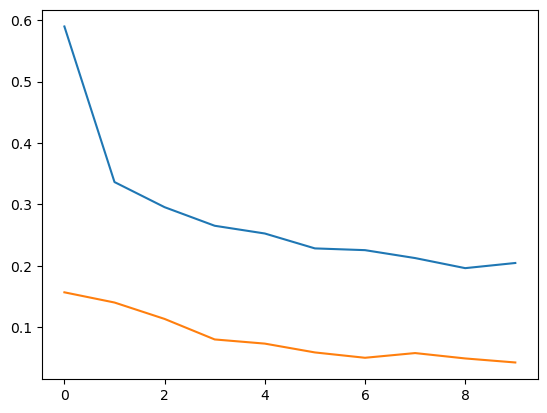

In [31]:
# Plot the Losses
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])

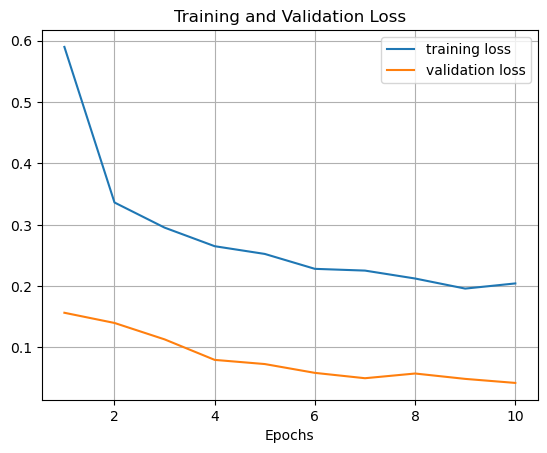

In [32]:
# Here we make the first plot for Loss
Epochs = [i+1 for i in range(len(model_training.history['accuracy']))]

plt.plot(Epochs, model_training.history['loss'], label = 'training loss')
plt.plot(Epochs, model_training.history['val_loss'], label = 'validation loss')
plt.grid(True)
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.show()

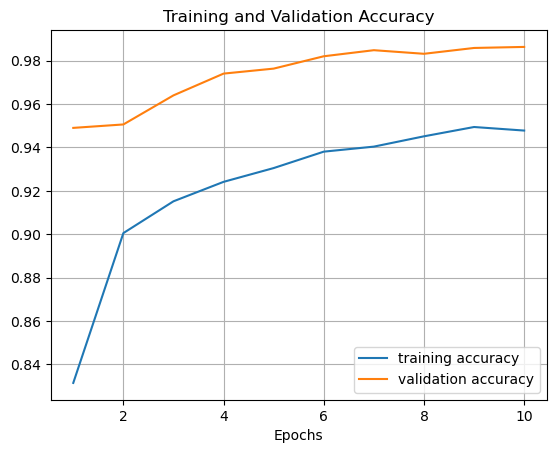

In [33]:
# Here we make the first plot for accuracy
Epochs = [i+1 for i in range(len(model_training.history['accuracy']))]

plt.plot(Epochs, model_training.history['accuracy'], label = 'training accuracy')
plt.plot(Epochs, model_training.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.show()

# Evaluation

In [34]:
results = mobilenet_model.evaluate(test_gen, verbose=1)

1698/1698 [==============================] - 171s 100ms/step - loss: 0.0422 - accuracy: 0.9864
